**Deep Learning - MAT494** 

**Assignment**

Adhitya Swaminathan -
1910110025

**Question 1 - GRNN**

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
#!pip install neupy
from neupy.algorithms import GRNN
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
 


In [ ]:
df = pd.read_csv('bodyfat.csv',index_col=0)
df

,age,DEXfat,waistcirc,hipcirc,elbowbreadth,kneebreadth,anthro3a,anthro3b,anthro3c,anthro4
47,57,41.68,100.0,112.0,7.1,9.4,4.42,4.95,4.50,6.13
48,65,43.29,99.5,116.5,6.5,8.9,4.63,5.01,4.48,6.37
49,59,35.41,96.0,108.5,6.2,8.9,4.12,4.74,4.60,5.82
50,58,22.79,72.0,96.5,6.1,9.2,4.03,4.48,3.91,5.66
51,60,36.42,89.5,100.5,7.1,10.0,4.24,4.68,4.15,5.91
...,...,...,...,...,...,...,...,...,...,...
113,53,11.21,66.6,92.2,6.1,8.5,2.40,2.58,2.05,3.18
114,31,14.18,69.7,93.2,6.2,8.1,3.10,3.36,2.76,4.14
115,27,20.84,66.5,100.0,6.5,8.5,3.50,4.14,3.76,5.04
116,52,19.00,76.5,103.0,7.4,8.5,3.33,3.73,3.21,4.64


In [ ]:
#Scaling values and splitting into train and test set.
df = pd.DataFrame(scale(df),columns = df.columns, index = df.index)
Y = df.DEXfat
X = df.drop(columns=['DEXfat'])
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y, train_size=45, random_state=15)

#training grnn
grnn = GRNN(std=2.5, verbose=True) 
grnn.train(X_train,Y_train)

#getting prediction
Y_pred = grnn.predict(X_test).reshape(len(X_test))
mse = np.mean((Y_pred-Y_test)**2)
print(f'Mean Sq Error: {mse}')


Main information

[ALGORITHM] GRNN

[OPTION] std = 2.5
[OPTION] verbose = True

Mean Sq Error: 0.21396861104005468


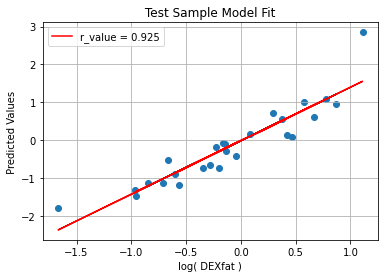

In [ ]:
#plot
plt.scatter(Y_pred,Y_test)
plt.xlabel('log( DEXfat )')
plt.ylabel(' Predicted Values ')
plt.title(' Test Sample Model Fit ')

slope,intecept,r_value, p_value, std_err = stats.linregress(Y_pred,Y_test)
plt.plot(Y_pred,slope*Y_pred+intecept, '-r', label=f'r_value = {r_value.round(3)}')
plt.grid()
plt.legend()
plt.show()

**Question 1 - PNN**

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
from neupy.algorithms import PNN
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("diabetes.csv", index_col=0)
df

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
1,6,148.0,72.0,35.0,NaN,33.6,0.627,50,pos
2,1,85.0,66.0,29.0,NaN,26.6,0.351,31,neg
3,8,183.0,64.0,NaN,NaN,23.3,0.672,32,pos
4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,neg
5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
764,10,101.0,76.0,48.0,180.0,32.9,0.171,63,neg
765,2,122.0,70.0,27.0,NaN,36.8,0.340,27,neg
766,5,121.0,72.0,23.0,112.0,26.2,0.245,30,neg
767,1,126.0,60.0,NaN,NaN,30.1,0.349,47,pos


In [ ]:
#cleaning the dataset(removing null rows and columns)
print("No of Null valued entries")
df.isnull().sum()
df.drop(columns=['insulin','triceps'],inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

No of Null valued entries


pregnant    0
glucose     0
pressure    0
mass        0
pedigree    0
age         0
diabetes    0
dtype: int64

In [ ]:
#sperating and scaling the values
Y = df.diabetes
X = df.drop(columns=['diabetes'])
X = pd.DataFrame(scale(X),columns = X.columns, index = X.index)

#converting positive and negative into 1 and 0 respectively
cat_type = pd.CategoricalDtype(categories=['neg','pos'],ordered=True)
Y = Y.astype(cat_type).cat.codes

#converting to train and test
df = pd.concat([X,Y],axis=1)
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y, train_size=600, random_state=13)

#training PNN
pnn = PNN(std = 0.5, verbose=True, batch_size=None) 
pnn.train(X_train,Y_train)

#Accuracy 
Y_pred = pnn.predict(X_test)
print('Accuracy', metrics.accuracy_score(Y_test,Y_pred))



Main information

[ALGORITHM] PNN

[OPTION] batch_size = None
[OPTION] std = 0.5
[OPTION] verbose = True

Accuracy 0.717741935483871


In [ ]:
#some other sigma values
#std = 1
pnn = PNN(std = 1.0, verbose=True)
pnn.train(X_train,Y_train)
Y_pred = pnn.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred))


Main information

[ALGORITHM] PNN

[OPTION] batch_size = 128
[OPTION] std = 1.0
[OPTION] verbose = True

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        84
           1       0.58      0.72      0.64        40

    accuracy                           0.74       124
   macro avg       0.72      0.74      0.72       124
weighted avg       0.76      0.74      0.75       124



In [ ]:
#std = 1.5
pnn = PNN(std = 1.5, verbose=True)
pnn.train(X_train,Y_train)
Y_pred = pnn.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred))


Main information

[ALGORITHM] PNN

[OPTION] batch_size = 128
[OPTION] std = 1.5
[OPTION] verbose = True

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        84
           1       0.62      0.78      0.69        40

    accuracy                           0.77       124
   macro avg       0.75      0.77      0.76       124
weighted avg       0.80      0.77      0.78       124



**Question 2**

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, ZeroPadding2D, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
#loading MNIST dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.mnist.load_data()
print(f'Image Size: {X_train[1].shape}')
print(f'No of Training Images: {X_train.shape[0]}')
print(f'No of Testing Images: {X_test.shape[0]}')

11493376/11490434 [==============================] - 0s 0us/step
Image Size: (28, 28)
No of Training Images: 60000
No of Testing Images: 10000


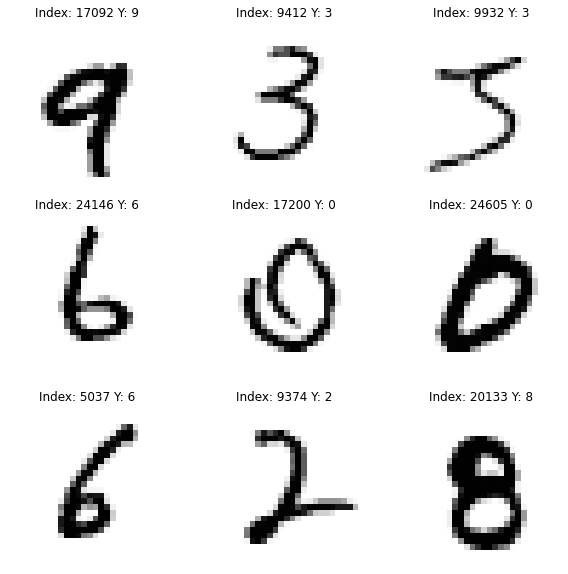

In [ ]:
#images from dataset
n = 3
fig, ax = plt.subplots(n,n,figsize=(10,10))
for i in range(n):
    for j in range(n):
        img_ind = np.random.randint(0,len(X_train))
        ax[i,j].imshow(X_train[img_ind],cmap='Greys')
        ax[i,j].axis('off')
        ax[i,j].set_title(f'Index: {img_ind} Y: {Y_train[img_ind]}')
plt.show()

In [ ]:
#Normalizing and one hot encoding
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)
X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_test = X_test.reshape((X_test.shape[0],28,28,1))

#training model
def build_model():
    model = Sequential()

    #First Conv Layer 
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation='relu', input_shape = (28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    #Second Conv Layer 
    model.add(Conv2D(filters = 128, kernel_size=(3,3), padding = 'same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    #Third Conv Layer 
    model.add(Conv2D(filters = 128, kernel_size=(3,3), padding = 'same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    #Fourth Conv Layer 
    model.add(Conv2D(filters = 128, kernel_size=(3,3), padding = 'same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(units = 256, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(units = 10, activation='softmax'))

    model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = build_model()
model.summary()  

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxP

In [ ]:
#fitting model
model.fit(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
19072/60000 [========>.....................] - ETA: 4:12 - loss: 0.3282 - acc: 0.8947

KeyboardInterrupt: ignored

**Question 3**

In [ ]:
#importing required datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('diabetes.csv',index_col=0)
df

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
1,6,148.0,72.0,35.0,NaN,33.6,0.627,50,pos
2,1,85.0,66.0,29.0,NaN,26.6,0.351,31,neg
3,8,183.0,64.0,NaN,NaN,23.3,0.672,32,pos
4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,neg
5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
764,10,101.0,76.0,48.0,180.0,32.9,0.171,63,neg
765,2,122.0,70.0,27.0,NaN,36.8,0.340,27,neg
766,5,121.0,72.0,23.0,112.0,26.2,0.245,30,neg
767,1,126.0,60.0,NaN,NaN,30.1,0.349,47,pos


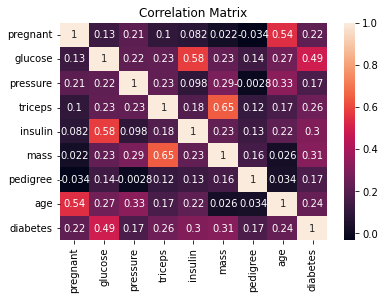

In [ ]:
#converting pos and neg to 1 and 0 respectively
cat_type = pd.CategoricalDtype(categories=['neg','pos'],ordered=True)
df.diabetes = df.diabetes.astype(cat_type).cat.codes

#plotting corelation matrix
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#finding and deleting colunmns which a lorge number of missing values
df.isnull().sum()

pregnant      0
glucose       5
pressure     35
triceps     227
insulin     374
mass         11
pedigree      0
age           0
diabetes      0
dtype: int64

In [ ]:
df.drop(columns=['triceps','insulin'],inplace=True)
df.columns

Index(['pregnant', 'glucose', 'pressure', 'mass', 'pedigree', 'age',
       'diabetes'],
      dtype='object')

In [ ]:
#seperation of response variable from rest and replacing missing values with mean of attribute
impute = SimpleImputer(strategy='median')
data = impute.fit_transform(X)
X = pd.DataFrame(data, columns=X.columns)

#scaling variables
impute = SimpleImputer(strategy='median')
data = impute.fit_transform(X)
X = pd.DataFrame(data, columns=X.columns)

#splitting into train and test
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y, train_size=600, random_state=10)

#building model
def build_model():
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(units = 64, activation='relu', input_shape = [len(X_train.keys())]))
    model.add(tf.keras.layers.Dropout(0.4))
    
    # Hidden Layer - I
    model.add(tf.keras.layers.Dense(units = 128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))

    # Hidden Layer - II
    model.add(tf.keras.layers.Dense(units = 128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))

    # Output Layer
    model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))


    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

model = build_model()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                448       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total para

In [ ]:
#fitting model
fit = model.fit(X_train, Y_train, epochs = 50, batch_size = 25, validation_data=(X_test,Y_test))

Train on 600 samples, validate on 124 samples
Epoch 1/50
600/600 [==============================] - 0s 635us/sample - loss: 0.6293 - acc: 0.6483 - val_loss: 0.5431 - val_acc: 0.7016
Epoch 2/50
600/600 [==============================] - 0s 131us/sample - loss: 0.5399 - acc: 0.7150 - val_loss: 0.4430 - val_acc: 0.8145
Epoch 3/50
600/600 [==============================] - 0s 138us/sample - loss: 0.5012 - acc: 0.7450 - val_loss: 0.4043 - val_acc: 0.8387
Epoch 4/50
600/600 [==============================] - 0s 114us/sample - loss: 0.4937 - acc: 0.7400 - val_loss: 0.3989 - val_acc: 0.8306
Epoch 5/50
600/600 [==============================] - 0s 132us/sample - loss: 0.4697 - acc: 0.7483 - val_loss: 0.3905 - val_acc: 0.8387
Epoch 6/50
600/600 [==============================] - 0s 119us/sample - loss: 0.4943 - acc: 0.7467 - val_loss: 0.3913 - val_acc: 0.8306
Epoch 7/50
600/600 [==============================] - 0s 131us/sample - loss: 0.4915 - acc: 0.7600 - val_loss: 0.3838 - val_acc: 0.8306
Ep

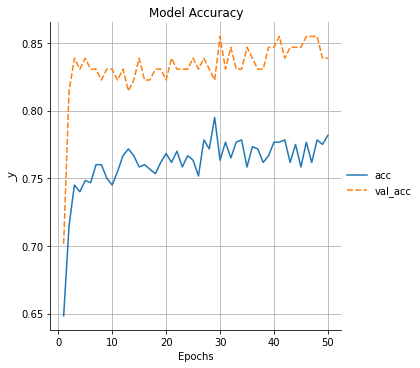

In [ ]:
#plotting accuracy of model
data = pd.DataFrame(fit.history)
data.index = np.arange(1,len(data)+1)
sns.relplot(data=data[['acc','val_acc']], kind='line')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.show()

In [ ]:
#classification report
pred = np.round(model.predict(X_test))
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        81
           1       0.81      0.70      0.75        43

    accuracy                           0.84       124
   macro avg       0.83      0.81      0.82       124
weighted avg       0.84      0.84      0.84       124

